# 프로젝트 1
### 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!
- data: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
- age: 환자의 나이
- sex: 환자의 성별
- bmi: 체질량지수
- bp: 평균 혈압
- s1: T-Cell count
- s2: Low-Density Lipoproteins
- s3: High-Density Lipoproteins 
- s4: 혈청 트리글리세라이드
- s5: Lamotrigine concentration
- s6: 혈당 수치
- target: 1년 후 당뇨병 진행 정도

### 0. 라이브러리

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### 1. 데이터 가져오기
- sklearn.datasets의 load_diabetes
- diabetes.data : df_X
- diabetes.target : df_y

In [12]:
diabetes = load_diabetes()
df_x = diabetes.data
df_y = diabetes.target

### 2. 모델에 입력할 데이터 X 준비하기
- df_x -> numpy array 변환
- 데이터 표준화 (StandardScaler)

In [16]:
df_x = np.array(df_x, dtype=np.float64)
scaler = StandardScaler()
df_x[0, :]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

### 3. 모델에 예측할 데이터 y 준비하기
- df_y -> numpy array 변환

In [17]:
df_y = np.array(df_y, dtype=np.float64)

### 4. train 데이터와 test 데이터로 분리하기
- train, test 분리

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


### 5. 모델 준비하기
- W와 b 초기화 (W:feature의 갯수, b:상수)
- 모델 함수 정의

In [23]:
W = np.random.rand(10) 
b = np.random.rand()

def model(x, W, b):
    predictions = 0
    for i in range(10):
        predictions += x[:, i] * W[i]
    predictions += b
    return predictions

### 6. 손실함수 loss 정의하기
- 손실함수: MSE함수

In [25]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean() 
    return mse

def loss(x, W, b, y):
    predictions = model(x, W, b)
    L = MSE(predictions, y)
    return L

### 7. 기울기를 구하는 gragient 함수 구현하기
- gradient 함수 정의

In [26]:
def gradient(x, W, b, y):
    N = len(y)
    y_pred = model(x, W, b)
    dW = (2/N) * (x.T.dot(y_pred - y))
    db = 2 * (y_pred - y).mean()
    return dW, db

### 8. 하이퍼 파라미터인 학습률 설정하기
- 시도한 학습률: 0.001, 0.01, 0.1, 0.2, 0.3
- 선택한 학습률: 0.2

In [27]:
LEARNING_RATE = 0.2

### 9. 모델 학습하기
- 모델 학습
- loss 과정 확인 (최적: 1600회)
- W, b 선정

In [28]:
losses = []

for i in range(1, 1601):
    dW, db = gradient(x_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db 
    L = loss(x_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
W;b

Iteration 10 : Loss 6115.6377
Iteration 20 : Loss 5953.7913
Iteration 30 : Loss 5802.8913
Iteration 40 : Loss 5661.3863
Iteration 50 : Loss 5528.6375
Iteration 60 : Loss 5404.0511
Iteration 70 : Loss 5287.0747
Iteration 80 : Loss 5177.1943
Iteration 90 : Loss 5073.9322
Iteration 100 : Loss 4976.8436
Iteration 110 : Loss 4885.5150
Iteration 120 : Loss 4799.5617
Iteration 130 : Loss 4718.6256
Iteration 140 : Loss 4642.3735
Iteration 150 : Loss 4570.4955
Iteration 160 : Loss 4502.7031
Iteration 170 : Loss 4438.7278
Iteration 180 : Loss 4378.3196
Iteration 190 : Loss 4321.2459
Iteration 200 : Loss 4267.2900
Iteration 210 : Loss 4216.2503
Iteration 220 : Loss 4167.9390
Iteration 230 : Loss 4122.1812
Iteration 240 : Loss 4078.8139
Iteration 250 : Loss 4037.6855
Iteration 260 : Loss 3998.6545
Iteration 270 : Loss 3961.5893
Iteration 280 : Loss 3926.3670
Iteration 290 : Loss 3892.8732
Iteration 300 : Loss 3861.0013
Iteration 310 : Loss 3830.6519
Iteration 320 : Loss 3801.7321
Iteration 330 : L

151.4947470728663

### 

### 10. test 데이터에 대한 성능 확인하기
- mse (test set)

In [29]:
prediction = model(x_test, W, b)
mse = loss(x_test, W, b, y_test)
mse

2847.695231989474

### 11. 정답 데이터와 예측한 데이터 시각화하기
- 산점도 비교 (원래값: 파란색, 예측값: 주황색)
- x축: x데이터 첫 번째 컬럼
- y축: target 데이터

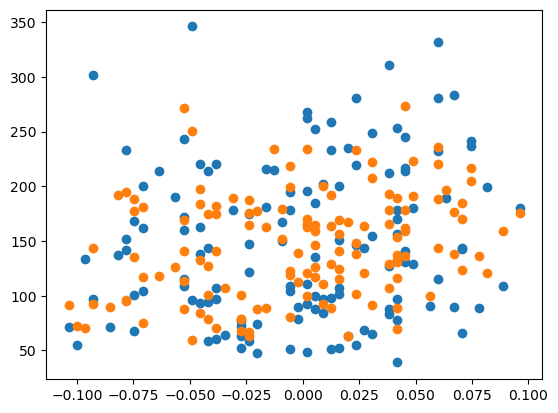

In [30]:
plt.scatter(x_test[:, 0], y_test)
plt.scatter(x_test[:, 0], prediction)
plt.show()